In [64]:
import pandas as pd
import pickle
from joblib import dump, load

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

In [65]:
# The data is downloaded from https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv
df = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data exploration and cleaning

In [66]:
df.shape

(21613, 21)

In [67]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [68]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
# Check is there is NaN value, if yes, you can simple drop this data point, or replace the value with mean.
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

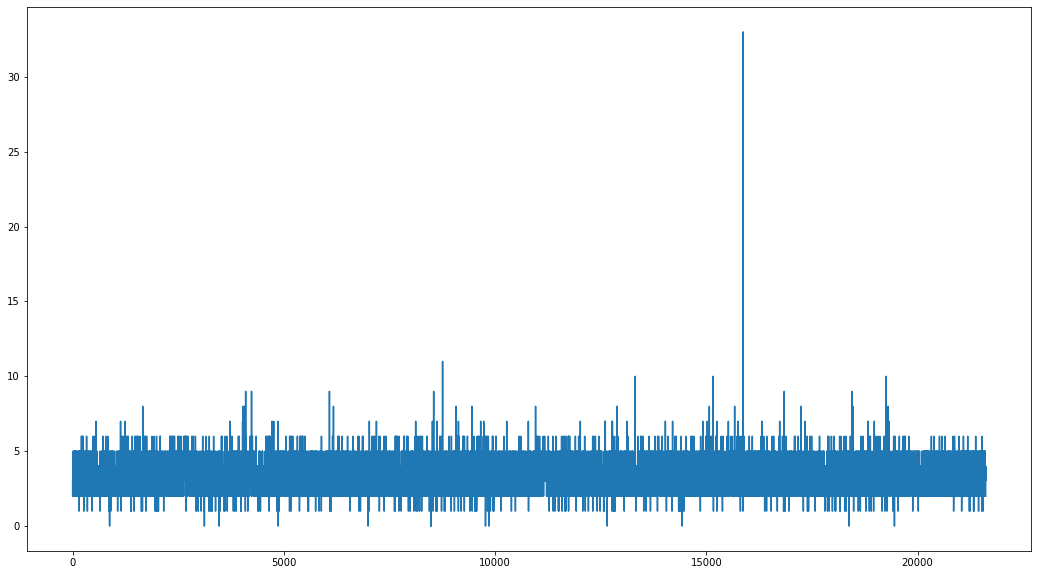

In [70]:
# plot the features
df['bedrooms'].plot()

In [71]:
df['bedrooms'].max()

33

In [72]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [73]:
df1 = df.drop(df[df['bedrooms']==33].index).copy().reset_index()

In [74]:
df1.shape

(21612, 22)

# Feature Engineering
* the background knowledge is very important to feature engineering

In [75]:
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2570
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680


In [76]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%M-%D")

In [77]:
df['sold_year'] = df['date'].dt.year

In [78]:
df['sold_month'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqft,sold_year,sold_month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,1180,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2570,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,770,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1960,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,1680,2015,2


# Machine learning model

## Split the data into training set and testing set

In [79]:
columns = df.columns.tolist()
columns

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'total_sqft',
 'sold_year',
 'sold_month']

In [80]:
features = columns[3:]
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'total_sqft',
 'sold_year',
 'sold_month']

In [81]:
X = df[features]
y = df['price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# np.save('data/X_test.npy', X_test.values)
# np.save('data/y_test.npy', y_test.values)

In [83]:
print(X_train.shape, y_train.shape)

(14480, 21) (14480,)


In [84]:
print(X_test.shape, y_test.shape)

(7133, 21) (7133,)


## Model 1: a simple linear regression model

In [85]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make prediction
y_pred = regr.predict(X_test)

In [86]:
y_pred

array([ 455997.05035503,  740855.40601458, 1228888.54369904, ...,
        531587.68109594,  489737.51043136,  349105.23634157])

In [87]:
# r2 score is a matrix to evaluate the performance of your model, [0, 1], the greater, the better.
r2_score(y_test, y_pred)

0.6979710049587393

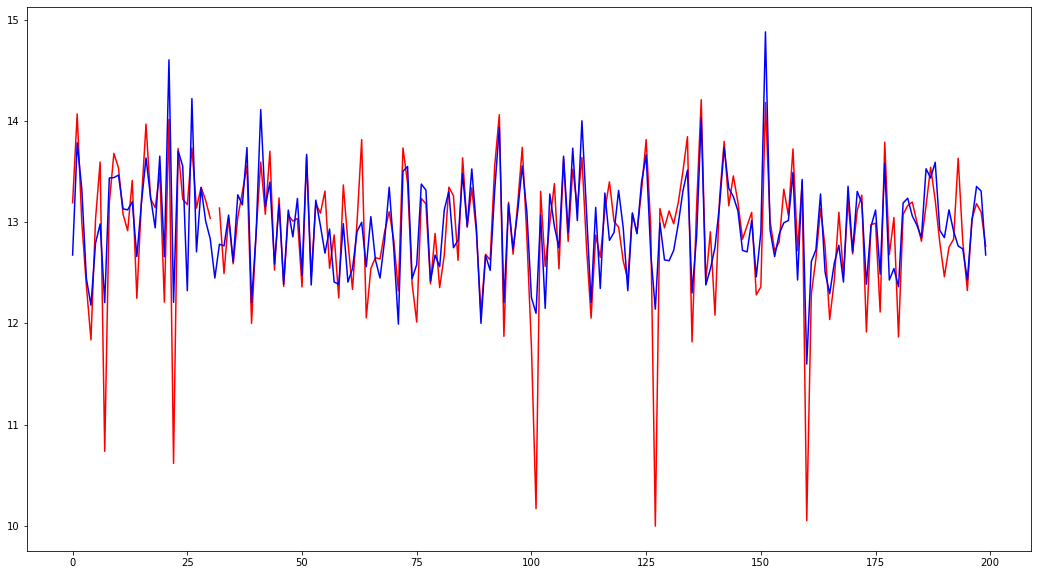

In [88]:
num_samples = 200
plt.plot([i for i in range(num_samples)], np.log(y_pred)[-num_samples:], 'r', np.log(y_test.values)[-num_samples:], 'b')
# plt.plot(np.log(y_test)[-100:])

In [37]:
dump(regr, 'model/regr.joblib') 

['regr.joblib']

In [38]:
clf = load('model/regr.joblib')
clf.predict(X_test)

array([ 455997.05035503,  740855.40601458, 1228888.54369904, ...,
        531587.68109594,  489737.51043136,  349105.23634157])

## Model 2: a Random Forest model

In [89]:
# Note the max_depth here, is called hype parameters. 
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test.values)

In [90]:
y_pred

array([ 401376.32010453,  830053.3814714 , 1092811.13620828, ...,
        579045.64983723,  539114.71516323,  274942.65136304])

In [91]:
r2_score(y_test, y_pred)

0.8468368714165759

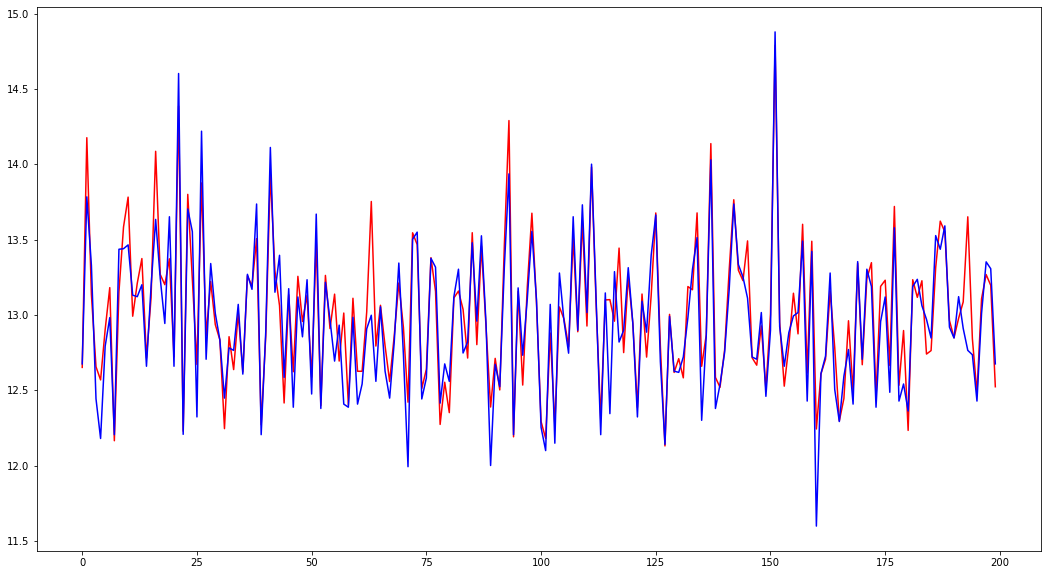

In [92]:
num_samples = 200
plt.plot([i for i in range(num_samples)], np.log(y_pred)[-num_samples:], 'r', np.log(y_test.values)[-num_samples:], 'b')
# plt.plot(np.log(y_test)[-100:])

In [47]:
dump(rf, 'model/rf.joblib')

['rf.joblib']

In [58]:
d_t = pd.DataFrame()
d_t['y_test'] = y_test.values
d_t['y_pred'] = y_pred
d_t

,y_test,y_pred
0,365000.0,4.013763e+05
1,865000.0,8.300534e+05
2,1038000.0,1.092811e+06
3,1490000.0,1.935832e+06
4,711000.0,7.151600e+05
...,...,...
7128,250000.0,2.636191e+05
7129,447500.0,4.932571e+05
7130,630000.0,5.790456e+05
7131,602000.0,5.391147e+05


In [63]:
df1 = pd.read_csv('kc_house_data.csv', parse_dates=['date'])
df_new = df1[['lat', 'long']]
df_new.columns = ['lat', 'lon']
df_new.head()

,lat,lon
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
